In [ ]:
import torch 
import networkx as nx
from torch_geometric.utils.convert import from_networkx

In [ ]:
# Get skeleton graph
treat_0 = nsw[nsw['treat']==0]
treat_1 = nsw[nsw['treat']==1]
del treat_0['treat']
del treat_1['treat']
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(nsw)
skeleton_treat0 = glasso.predict(treat_0)
skeleton_treat1 = glasso.predict(treat_1)

PC is ran on the skeleton of the given graph.


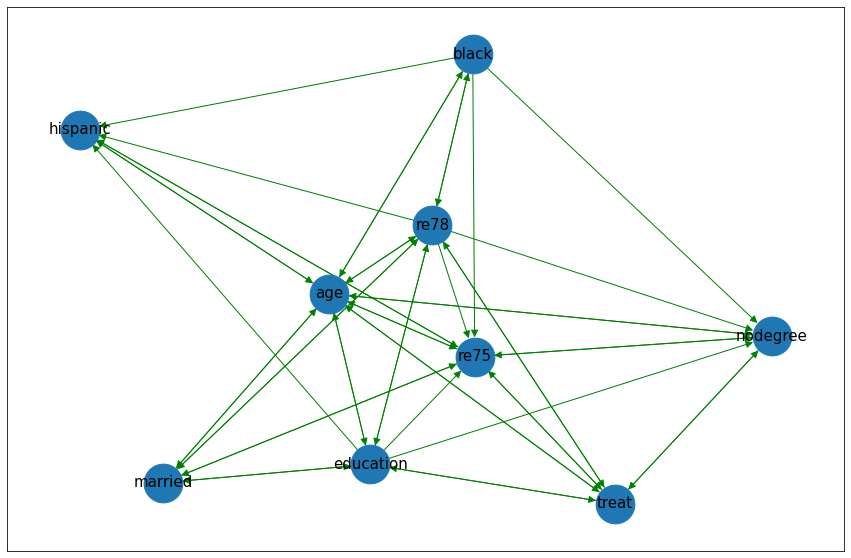

In [ ]:
#Run PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc_treat0 = model_pc.predict(treat_0, skeleton_treat0)
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_treat0, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')

PC is ran on the skeleton of the given graph.


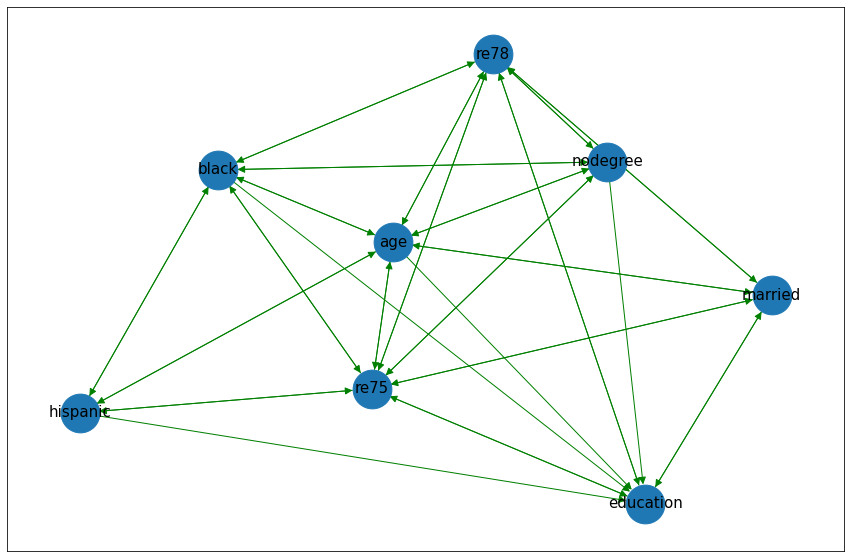

In [ ]:
model_pc = cdt.causality.graph.PC()
graph_pc_treat1 = model_pc.predict(treat_1, skeleton_treat1)
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_treat1, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')


PC is ran on the skeleton of the given graph.


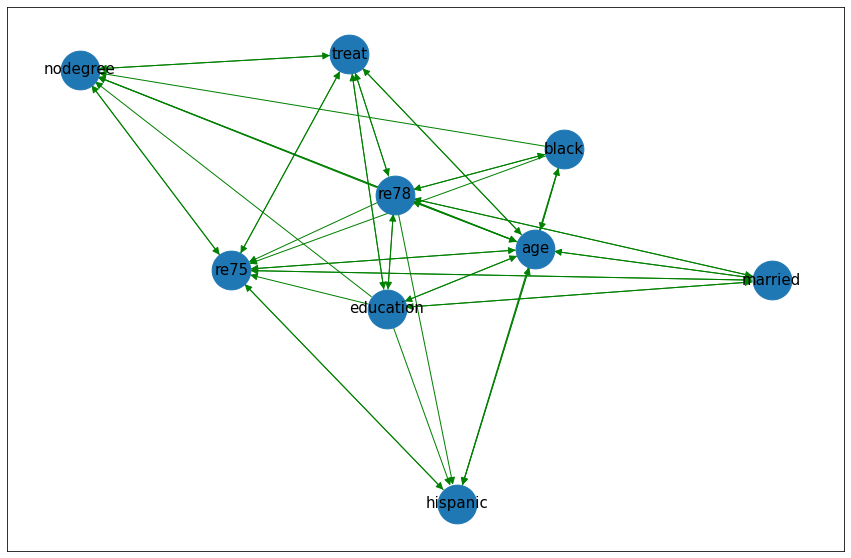

In [ ]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(nsw)
model_pc = cdt.causality.graph.PC()
graph_pc_nsw = model_pc.predict(nsw, skeleton)
fig =plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc_nsw, font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green')

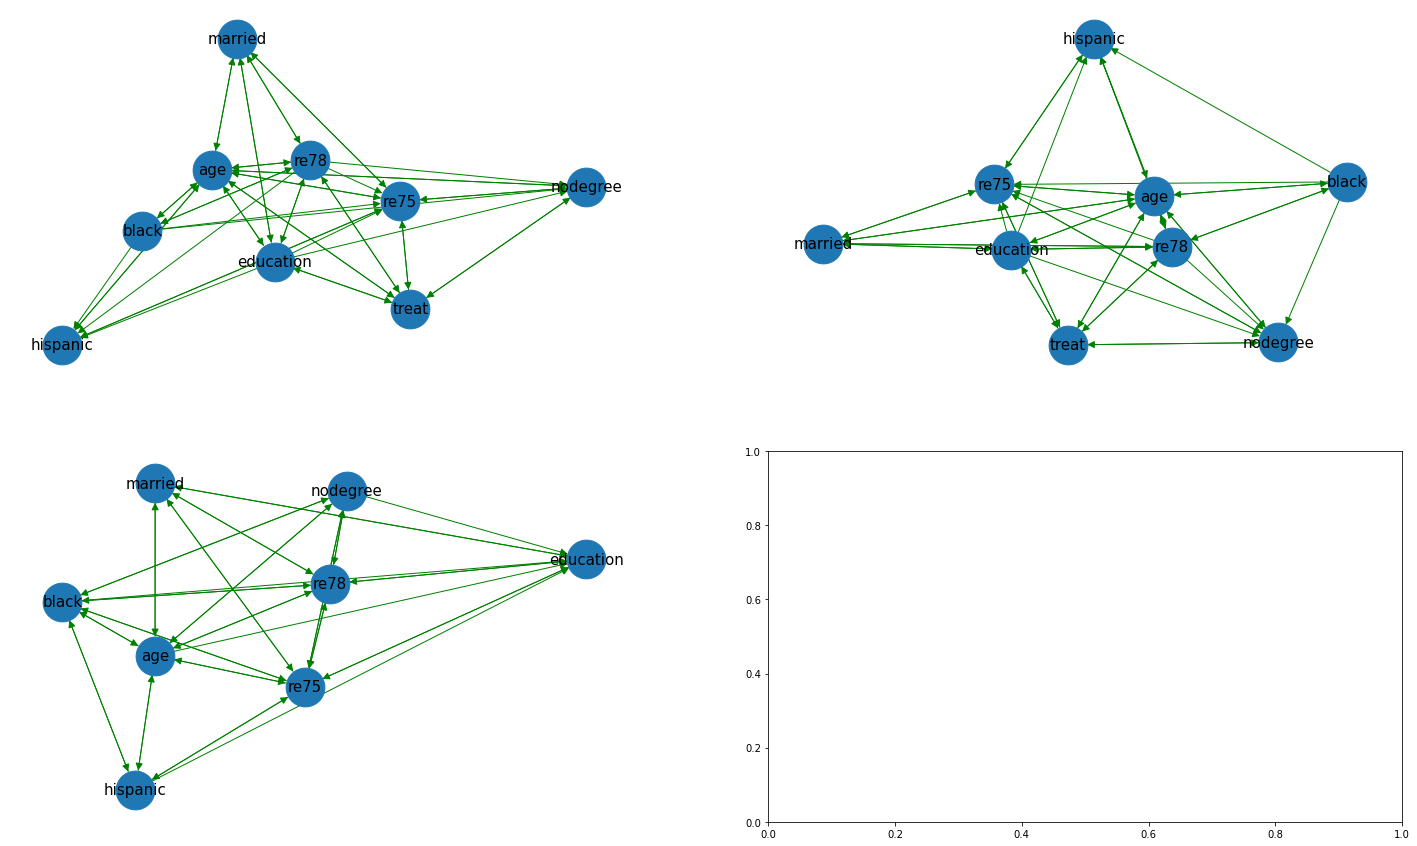

In [ ]:
#Plot all graphs

graphs = [graph_pc_nsw,graph_pc_treat0,graph_pc_treat1]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(25, 15))
#fig, axs = plt.subplot_mosaic([['a)'], ['b)'], ['d)']])

ax = axes.flatten()

for i in range(3):
    nx.draw_networkx(graphs[i],font_size=15 ,node_size=1500,edge_cmap='Reds',arrowsize=15,edge_color='Green' , ax=ax[i])
    ax[i].set_axis_off()

plt.show()


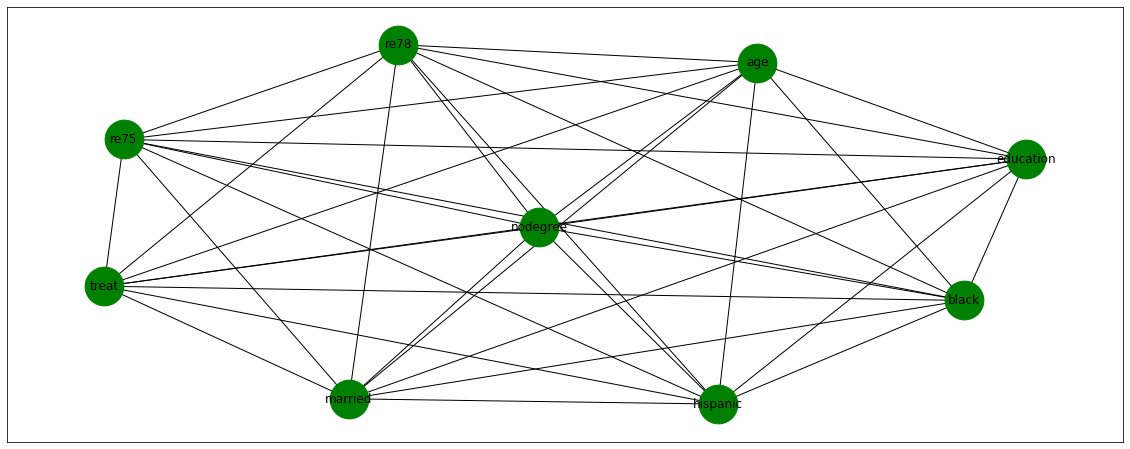

In [ ]:
C = nx.complete_graph(nsw)
C_matrix = nx.to_numpy_matrix(C)
C_df = pd.DataFrame(np.matrix(C_matrix))

#Plot graph 
fig=plt.figure(figsize=(20,8))
nx.draw_networkx(C, node_color = 'green',node_size = 1500)

In [ ]:
# Conditonal independence testing using the CCIT - https://arxiv.org/abs/1709.06138
from CCIT import CCIT
from CCIT import DataGen

nsw = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Data/nsw.dta")
del nsw['data_id']
#Normalise data between a range of 0 and 1
for col in nsw.columns:
    nsw[col] = (nsw[col] - np.min(nsw[col])) / (np.max(nsw[col]) - np.min(nsw[col])) 

# Convert variables to numpy arrays  

treat_a  = np.array([nsw['treat']])
age_a  = np.array([nsw['age']])
educ_a  = np.array([nsw['education']])
black_a = np.array(nsw['black'])
hispanic_a = np.array(nsw['hispanic'])
married_a = np.array(nsw['married'])
nodegree_a = np.array(nsw['nodegree'])
re75_a = np.array(nsw['re75'])
re78_a = np.array(nsw['re78'])

# Reshape arrays 

treat_a = treat_a.reshape(722,1)
age_a = age_a.reshape(722,1)
educ_a = educ_a.reshape(722,1)
black_a = black_a.reshape(722,1)
hispanic_a = hispanic_a.reshape(722,1)
married_a = married_a.reshape(722,1)
nodegree_a = nodegree_a.reshape(722,1)
re75_a = re75_a.reshape(722,1)
re78_a = re78_a.reshape(722,1)


## Generate sets for conditional independence testing 

emptyset = [0]*722
emptyset = np.array(emptyset)
emptyset = emptyset.reshape(722,1)

# n-dimensional arrays

z_1 = np.array(nsw[['married','hispanic','education']])


In [ ]:
#0th order CI test
ci_pvals = []
pvalue = CCIT.CCIT(age_a,nodegree_a,z_1) 
ci_pvals.append(pvalue)
ci_pvals

# Visualise the complete graph as a dataframe
cols = {0:'treat',1:'age',2:'education',3:'black',4:'hispanic',5:'married',6:'nodegree',7:'re75',8:'re78'}
rows = {0:'treat',1:'age',2:'education',3:'black',4:'hispanic',5:'married',6:'nodegree',7:'re75',8:'re78'}
C_df = C_df.rename(columns=cols, index=rows)
C_df

def combs(a):
    if len(a) == 0:
        return [[]]
    cs = []
    for c in combs(a[1:]):
        cs += [c, c+[a[0]]]
    return cs

combinations = combs([0,1,2,3,4,5,6,7,8,9])

[0.5222283244921728]